In [15]:
%matplotlib inline

from modsim import *
#AMY!!!
#If you are reading this, I made a bunch of odd changes to try to get a graph that shows the temperature over time.
#So far, i just have joules and am trying to convert the time frame to temperature, but it's taking a while
#Unfortunately, I didn't add any comments
#If you want to try to understand it, go ahead, also feel free to text me with any questions
#If that is too much, we'll just handle it before monday after you get back
#Signed,
#Nathan
#EVERYTHING IN SI UNITS, celcius

#specific heat of water
w_c = 4.178

#ice cube system
#m = mass
#c = specific heat
#random number that will be changed later r = rate in Joules per second
r = 80
i = System(c = 2108, T_init = -18, T_final = 0)
#water sytem
w = System(c = 4187, T_init = 0, T_final = 23)
Water = System(m = 0.01, i=i, w=w, L = 3333333, r = r)
#function: calculate heat needed to heat ice to 0C
def heat_ice(system):
    unpack(system)
    heat_needed = m*i.c*(i.T_final-i.T_init)
    return heat_needed
def heat_water(system):
    unpack(system)
    heat_needed = m*w.c*(w.T_final-w.T_init)
    return heat_needed
def melt(system):
    unpack(system)
    heat_needed = m*L
    return heat_needed

In [16]:
heat_ice(Water)

379.44000000000005

In [17]:
heat_water(Water)

963.00999999999999

In [18]:
melt(Water)

33333.33

In [19]:
def update(state, system):
    """Update the thermal transfer model.
    
    state: State (temp)
    system: System object
    
    returns: State (temp)
    """
    unpack(system)
    T = state.temp
    T += -r * (T - T_env) * dt

    return State(temp=T)

In [20]:
def convert_joules_to_temp(j):
    if(j < 379.44):
        t = (j -379.44) * 18 / 379.44
    elif(j >= 379.44 and j < (379.44 + 33333.33)):
        t = 0
    else:
        t = (j - (379.44+33333.33)) / 963.01 * 23
    return t

In [21]:
convert_temp_to_joules(33333.33+963.01+379.44)

NameError: name 'convert_temp_to_joules' is not defined

In [86]:
#random number that will be changed later r = rate in Joules per seconds
r = 83.333
i = System(c = 2108, T_init = -18, T_final = 0)
#water sytem
J_init = State(nrg = 0)
T_init = State(temp = -18.0)
w = System(c = 4187, T_init = 0, T_final = 23)
Coffee = System(m = 200, w_c = 4187, r = r, J_init = )
Water = System(m = 0.01,i_c = 2108, w_c = 4187, L = 3333333, r = r, J_init = J_init, dt = 1, t0 = 0, t_end = 500, T_init = T_init)

In [87]:
def update(state,system):
    """Update the thermal transfer model.
    
    state: State (temp)
    system: System object
    
    returns: State (temp)
    """
    unpack(system)
    J = state.nrg
    J += r * dt
    return State(nrg = J)

In [88]:
Water = update(Water)
Water

TypeError: update() missing 1 required positional argument: 'system'

In [89]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
    
    Add a TimeFrame to the System: results
    
    system: System object
    update_func: function that updates state
    """
    unpack(system)
    
    frame = TimeFrame(columns=J_init.index)
    frame.loc[t0] = J_init
    ts = linrange(t0, t_end, dt)
    
    for t in ts:
        frame.loc[t+dt] = update_func(frame.loc[t], system)
    
    system.results = frame

In [90]:
def convert_to_Temp(system):
    unpack(system)
    frame = TimeFrame(columns=T_init.index)
    frame.loc[t0] = State(temp = convert_joules_to_temp(J_init.nrg))
    ts = linrange(t0, t_end, dt)
    for t in ts:
        frame.loc[t+dt] = State(temp=convert_joules_to_temp(Water.results.loc[t].nrg))
    system.newResults = frame

In [91]:
run_simulation(Water,update)
convert_to_Temp(Water)

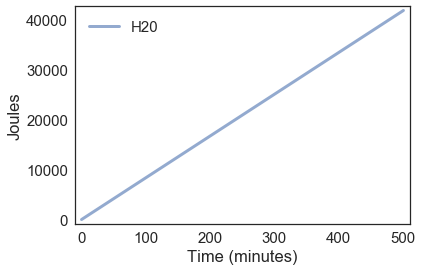

In [92]:
plot(Water.results.nrg, label='H20')
decorate(xlabel='Time (minutes)',
         ylabel='Joules')

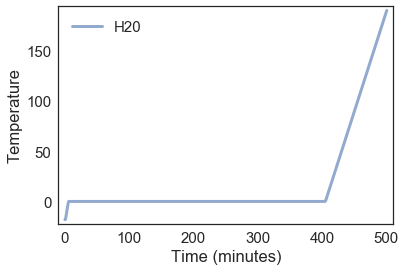

In [93]:
plot(Water.newResults.temp, label='H20')
decorate(xlabel='Time (minutes)',
         ylabel='Temperature')